In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1>Python for physicists</h1>

[https://is.muni.cz/predmet/sci/jaro2017/F4500](https://is.muni.cz/predmet/sci/jaro2017/F4500)<br>
[https://github.com/ziky5/F4500_Python_pro_fyziky](https://github.com/ziky5/F4500_Python_pro_fyziky)

<p>
Filip Hroch<br>
Petr Klenovský<br>
Filip Münz<br>
Adam Obrusník<br>
Petr Synek<br>
Jan Voráč<br>
Jiří Polcar<br>
Jakub Wagner<br>
Petr Zikán<br>
</p>

Goals:

* effective scientific data processing using Python for anyone
* involve as much physics as possible
* show few typical workflow patterns in physics

# Overview

* our approach
* quick overview of the course:
    * linear regresion
    * particle tracking in EM field
    * Fourier analysis of plasma response
    * introduction to machine learning

# Our approach

* since standard course on Python is already present at the university (Introduction to programming, Faculty of Informatics)

* focus on the way how physicists use Python usually (numpy, pandas, scipy)

* minimize amount of time spent with theory (explain fundamentals of the language as we go using examples)

* try to involve students into the programming during lectures

* lectures took place in computer room, so that all students had access to computers

* we used Jupyter notebooks for lectures, each lecture took 3 hours

* checkpoints and quizes

# Lecture 1 (Filip Hroch, Petr Zikán, Petr Klenovský)

* there was quite an intensive debate about how the course should start

* we decided to start with a template of how to solve a typical lab problem: linear regresion

* this is very typical problem for students of physics

# Problem

* suppose we have data stored in a csv file (that is quite common format even for Excel users)

In [2]:
!cat data.csv

T,A,B
15.0,0.1734,459.0
16.0,0.1782,450.0
17.0,0.1831,441.0
18.0,0.1880,435.0
19.0,0.1928,427.0
20.0,0.1976,419.0
21.0,0.2024,411.0


* first column is a parameter ($T$), second and third is a dependent variable ($A$, $B$)

* usually, you need to do some data processing: we chose simple multiplication for this case:

$$ C = A \cdot B $$

* the value of interest was the slope of curve $C(T)$

# Solution with Pandas

* this was a typical cold start problem: how to show a linar regresion in Python to students without any previous knowledge of the language?

* we decided to use pandas DataFrame, as it maps perfectly to Excel spreadsheets

In [3]:
import pandas
data = pandas.read_csv('data.csv')
data

,T,A,B
0,15.0,0.1734,459.0
1,16.0,0.1782,450.0
2,17.0,0.1831,441.0
3,18.0,0.1880,435.0
4,19.0,0.1928,427.0
5,20.0,0.1976,419.0
6,21.0,0.2024,411.0


# Multiplication

In [4]:
data['C'] = data['A'] * data['B']
data

,T,A,B,C
0,15.0,0.1734,459.0,79.5906
1,16.0,0.1782,450.0,80.1900
2,17.0,0.1831,441.0,80.7471
3,18.0,0.1880,435.0,81.7800
4,19.0,0.1928,427.0,82.3256
5,20.0,0.1976,419.0,82.7944
6,21.0,0.2024,411.0,83.1864


# Simple graphical visualisation

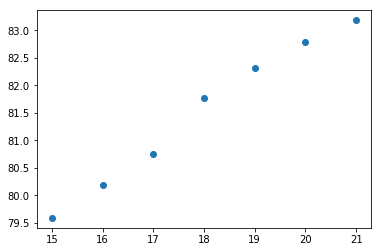

In [5]:
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.plot(data['T'], data['C'], 'o')

# Linear regresion

* the tricky part

In [6]:
import scipy.optimize
scipy.optimize.curve_fit?

**scipy.optimize.curve_fit**(``f``, ``xdata``, ``ydata``, ...)<br>
Use non-linear least squares to fit a function, ``f``, to data.<br>
Assumes ``ydata = f(xdata, *params) + eps``<br>
### Parameters
* ``f`` : callable<br>
    The model function, f(x, ...).  It must take the independent<br>
    variable as the first argument and the parameters to fit as<br>
    separate remaining arguments.<br>
* ``xdata`` : An M-length sequence or an (k,M)-shaped array<br>
    for functions with k predictors.<br>
    The independent variable where the data is measured.<br>
* ``ydata`` : M-length sequence<br>
    The dependent data --- nominally f(xdata, ...)<br>
    
### Returns
* ``popt`` : array<br>
    Optimal values for the parameters so that the sum of the squared error<br>
    of ``f(xdata, *popt) - ydata`` is minimized<br>
* ``pcov`` : 2d array<br>
    The estimated covariance of popt. The diagonals provide the variance<br>
    of the parameter estimate. To compute one standard deviation errors<br>
    on the parameters use ``perr = np.sqrt(np.diag(pcov))``.<br>

In [7]:
import scipy.optimize

def f(x, C0, C1):
    return C0 * x + C1

popt, pcov = scipy.optimize.curve_fit(f, data['T'], data['C'])
popt

array([  0.62766786,  70.21827857])

# Ploting with linear model

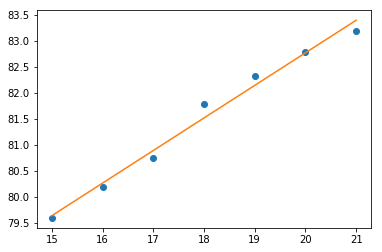

In [8]:
matplotlib.pyplot.plot(data['T'], data['C'], 'o')
y = f(data['T'], popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data['T'], y)

# Better graphics

* little "magic" can do the trick

In [9]:
matplotlib.pyplot.rcParams['figure.autolayout'] = True
matplotlib.pyplot.rcParams['figure.figsize'] = 12, 7
matplotlib.pyplot.rcParams['axes.labelsize'] = 25
matplotlib.pyplot.rcParams['axes.titlesize'] = 25
matplotlib.pyplot.rcParams['font.size'] = 25
matplotlib.pyplot.rcParams['lines.linewidth'] = 2.0
matplotlib.pyplot.rcParams['lines.markersize'] = 12
matplotlib.pyplot.rcParams['legend.fontsize'] = 25
matplotlib.pyplot.rcParams['text.usetex'] = True
matplotlib.pyplot.rcParams['text.latex.unicode'] = True
matplotlib.pyplot.rcParams['font.family'] = "serif"
matplotlib.pyplot.rcParams['font.serif'] = "cm"
matplotlib.pyplot.rcParams['xtick.major.pad'] = 10.0
matplotlib.pyplot.rcParams['ytick.major.pad'] = 10.0
matplotlib.pyplot.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm} "

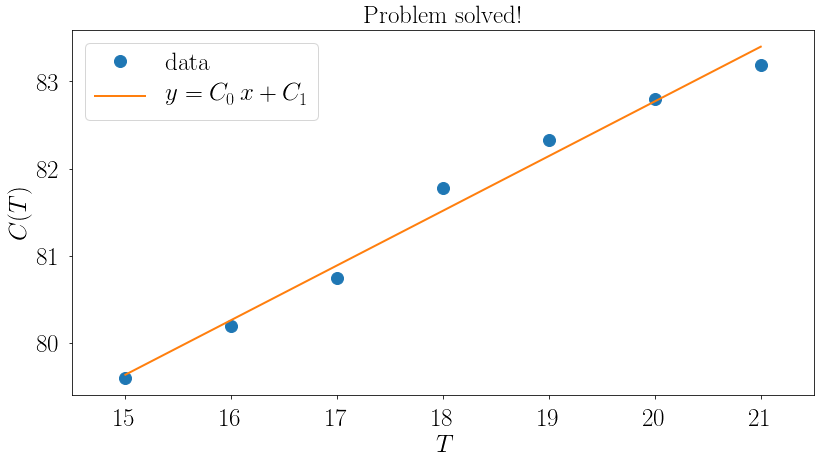

In [10]:
matplotlib.pyplot.plot(data['T'], data['C'], 'o', label='data')
y = f(data['T'], popt[0], popt[1]) # y = C0 * x + C1
matplotlib.pyplot.plot(data['T'], y, label=r'$y = C_0 \, x + C_1$')
matplotlib.pyplot.legend(loc='best')
matplotlib.pyplot.xlim([14.5, 21.5])
matplotlib.pyplot.xlabel(r"$T$")
matplotlib.pyplot.ylabel(r"$C(T)$")
matplotlib.pyplot.title("Problem solved!")

# Lecture 2

* Python environment installation to students' laptop
* for the remaining time, we prepared a small quiz for students, it was a modification of lecture 1
* it was focused on using web resources and Python excelent documentation
* students were supposed to work on their own, we're just guiding them and answering their questions

# Lecture 3 & 4: Path to the roots (Filip Hroch, Petr Zikán)

### Lecture 3:

* Python lists and arrays
* basic plotting using matplotlib
* functions and their usage (definition of Fourier serie and plotting Bessel functions from ``scipy.special``)
* finding resolution of a telescope (using simple graphical method)
* for loops (resolution of a telescope using bisection method)

### Lecture 4

* the difference between alias and a value
* manipulation with strings
* mutable and immutable data strunctures in python
* data types and conversion
* working with files

# Lecture 5: Fun with Adam (Obrusník)

Particle tracking in EM fields

In classical mechanics the state of the particle is fully described by 6 values:
$$ x, y, z, v_x, v_y, v_z $$

The motion of the particle is described by:
$$ \frac{\mathrm{d}^2\mathbf{r}(t)} {\mathrm{d}t^2} = \frac{q}{m} \left(\mathbf{E}(\mathbf{r}, t) + \mathbf{v} \times \mathbf{B}(\mathbf{r}, t)\right)$$

However, for the numerical solver, you need to do some manipulation:
$$\frac{\mathrm{d} x}{\mathrm{d}t} = v_x$$
$$\frac{\mathrm{d} y}{\mathrm{d}t} = v_y$$
$$\frac{\mathrm{d} z}{\mathrm{d}t} = v_z$$
$$\frac{\mathrm{d} v_x}{\mathrm{d}t} = \frac{q}{m} (E_x + v_y B_z - v_z B_y)$$
$$\frac{\mathrm{d} v_y}{\mathrm{d}t} = \frac{q}{m} (E_y + v_z B_x - v_x B_z)$$
$$\frac{\mathrm{d} v_z}{\mathrm{d}t} = \frac{q}{m} (E_z + v_x B_y - v_y B_x)$$

In [11]:
def rhs(t, q):
    """This function describes the problem to be integrated - it gives the right hand sides of our system of 6 ODEs.
    This function takes two arguments:
        t -- time
        q -- vector of independent variables (x, y, z, vx, vy, vz)
    And it returns a single vector:
        dqdt -- time derivative of the vector q
    """
    qp = -1.6e-19
    mp = 9.103e-31
    
    r = q[0:3]
    vx, vy, vz = q[3:6]
    
    Ex, Ey, Ez = E(t,r)
    Bx, By, Bz = B(t,r)
    
    dxdt, dydt, dzdt = vx, vy, vz
    
    dvxdt = qp/mp * (Ex + vy*Bz - vz*By)
    dvydt = qp/mp * (Ey + vz*Bx - vx*Bz)
    dvzdt = qp/mp * (Ez + vx*By - vy*Bx)
    
    dqdt = [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]
    
    return dqdt

In [12]:
def E(t,r):
    """This is the function returning the vector of the electric field for
    a specific time t and position vector r.
    In this simple case, the function returns a constant vector"""
    Ex = 0
    Ey = 0
    Ez = 1e-7
    
    return (Ex, Ey, Ez)

def B(t,r):
    """This is the function returning the vector of the electric field for
    a specific time t and position vector r.
    In this simple case, the function returns a constant vector"""
    Bx = 0
    By = 0
    Bz = 1e-6
    
    return (Bx, By, Bz)

In [14]:
from scipy.integrate import ode
import numpy as np

tf = 8e-5 # final time 
dt = 5e-9 # time step

t0 = 0 # initial time
q0 = [0, 0, 0, 0, 1000, 0] # initial values of coordinate and velocity respectively

times = np.array([t0]) # numpy array where we are going to store time steps that the simulation makes
results = np.array(q0) # numpy array where we are going to store positions and velocities.

# The following four lines are solving the differential equation 
r = ode(rhs) # We call the scipy.integrate.ode() function and pass it the rhs() function as argument
r.set_initial_value(q0, t0) # then we set initial value of the independent variables and time

# And finally, we run a while loop until we reach the final time.
while r.successful() and r.t < tf: 
    times = np.vstack([times, r.t+dt])
    results = np.vstack([results, r.integrate(r.t+dt)])

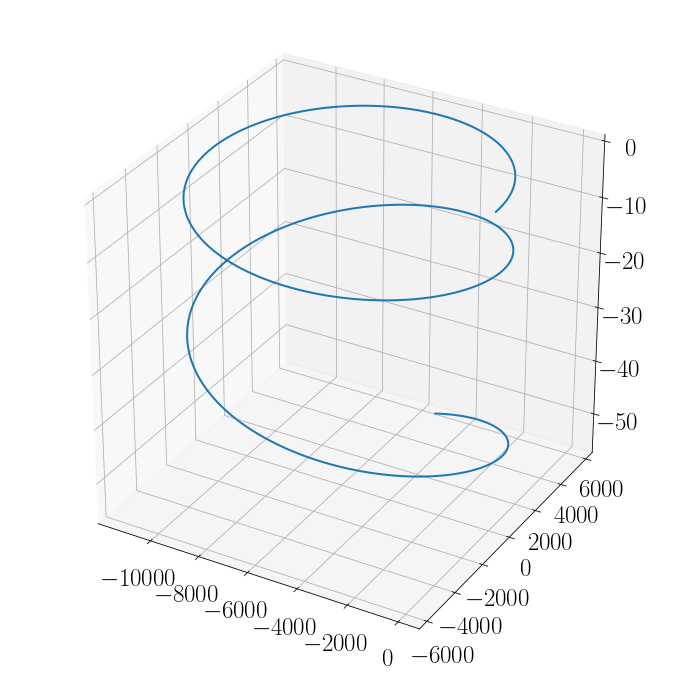

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.cla()
plt.clf()

# Firstly, we initialize the figure and the only thing we specify are its dimensions
fig = plt.figure(figsize=(10,10))
# Then, we create coordinate axes and by passing the projection='3d' keyword argument, we tell matplotlib
# that we will be making a 3D picture. If we need to make any modifications to the axes later,
# we will be modifying the "ax" object.
ax = fig.gca(projection='3d') 
# Now that matplotlib knows that we are going to plot 3D data, we can call our
# usual plot() function, but instead of pasing it (x,y) data, we pass it (x,y,z) data, very simple.
plt.plot(results[:,0] * 1e6, results[:,1] * 1e6, results[:,2] * 1e6)

# And finally, we reveal the beautiful picture.
plt.show()

# Lecture 6: Dvořák's hypothesis (Filip Hroch)

The goal of the lecture was to verify a hypothesis of our collegue dr. Pavel Dvořák:

*
Plasma response right after it's ignition should be a pure sinusoidal signal. On the other hand, the plasma response in the steady-state will have, thanks to it's nonlinear nature, much more complicated time dependence. Fourier spectra of the begining of the pulse will, therefore, consist only from one frequency. On the other hand, in the steady-state there will be many higher harmonics of the driving frequency.
*

In [28]:
import readTrc as lecroy
filename = 'C3H2_7Pa_1kHz_dc3000000.trc'
t,U,info = lecroy.readTrc('C3H2_7Pa_1kHz_dc3000000.trc')

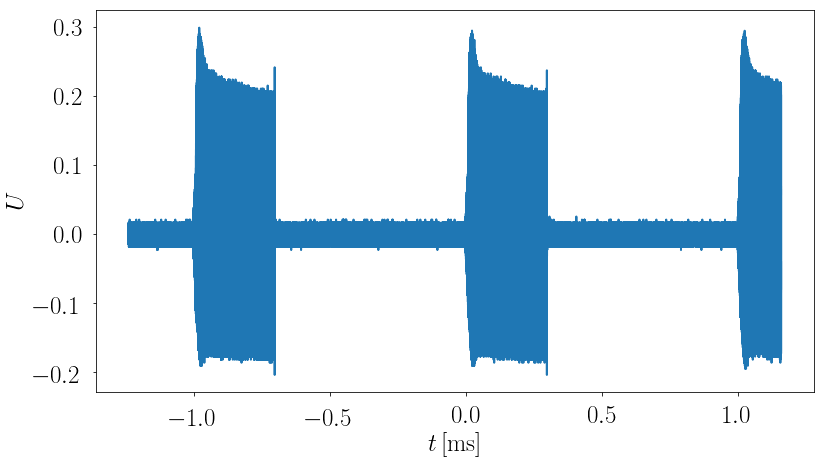

In [29]:
plt.plot(t * 1000, U)
plt.xlabel('$t\,[\mathrm{ms}]$')
plt.ylabel('$U$')
plt.show()

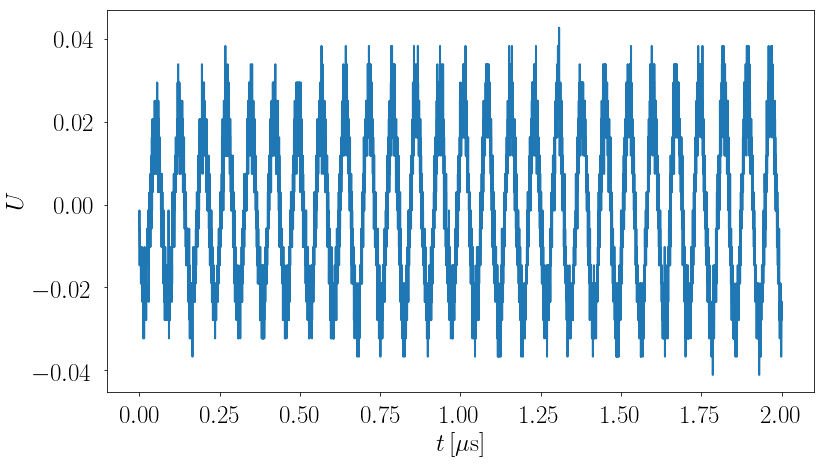

In [30]:
plt.figure()
fr_start = 1200000
to_start = 1210000
plt.plot(t[fr_start:to_start] * 1e6 + 1000, U[fr_start:to_start])
plt.xlabel('$t\,[\mu\mathrm{s}]$')
plt.ylabel('$U$');

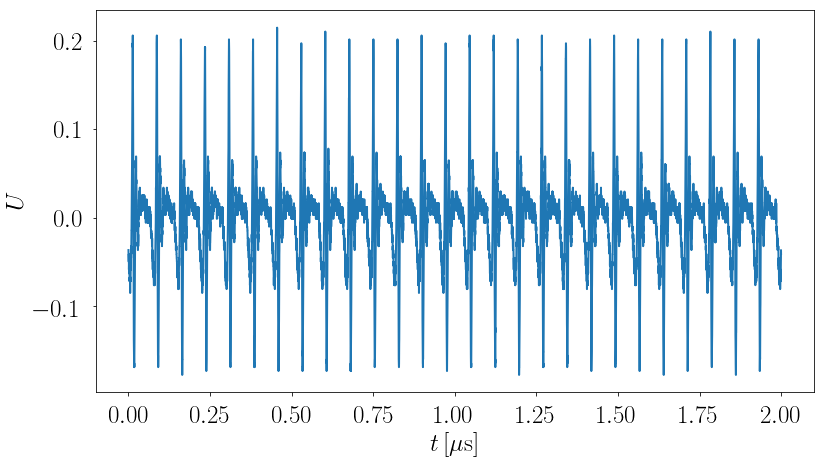

In [31]:
plt.figure()
fr_end = 2200000
to_end = 2210000
plt.plot(t[fr_end:to_end] * 1e6 + 800, U[fr_end:to_end])
plt.xlabel('$t\,[\mu\mathrm{s}]$')
plt.ylabel('$U$');

In [32]:
import scipy.signal

sampling_frequency = 1/2.000000026702864e-10
t_start = t[fr_start:to_start]
U_start = U[fr_start:to_start]
U_end = U[fr_end:to_end]
t_end = U[fr_end:to_end]

f_start, Pxx_den_start = scipy.signal.periodogram(U_start, sampling_frequency)
f_end, Pxx_den_end = scipy.signal.periodogram(U_end, sampling_frequency)

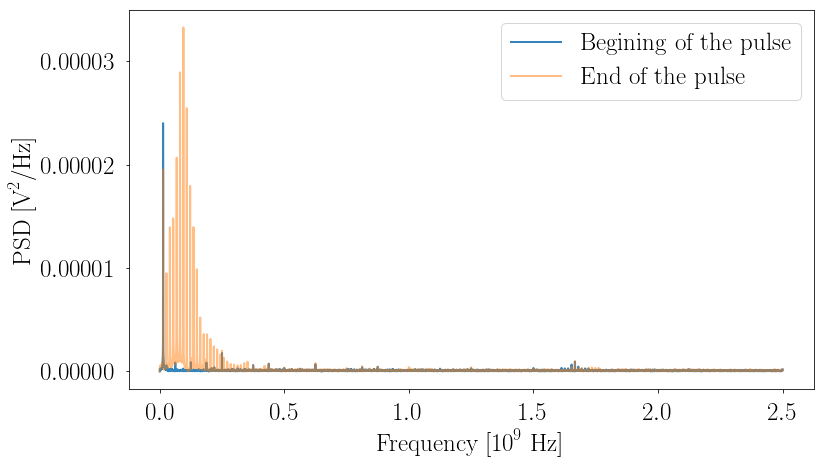

In [33]:
plt.figure()
plt.plot(f_start / 1e9, np.sqrt(Pxx_den_start), alpha=0.9, label="Begining of the pulse")
plt.plot(f_end / 1e9, np.sqrt(Pxx_den_end), alpha=0.5, label="End of the pulse")
plt.xlabel('Frequency [10$^9$ Hz]')
plt.ylabel(r'PSD [V$^2$/Hz]')
plt.legend()
plt.show()

In [57]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
font_size = '15pt'

fig = bokeh.plotting.Figure(plot_width=750, plot_height=500)
fig.line(f_start / 1e6, np.sqrt(Pxx_den_start) * 1e5, line_color='blue', line_width=2)
fig.line(f_end / 1e6, np.sqrt(Pxx_den_end) * 1e5, line_color='orange', line_alpha=0.5, line_width=2)
fig.xaxis.axis_label = 'Frequency [MHz]'
fig.xaxis.axis_label_text_font_size = font_size
fig.yaxis.axis_label = 'PSD [10^5 V^2/Hz]'
fig.yaxis.axis_label_text_font_size = font_size
fig.xaxis.major_label_text_font_size = font_size
fig.yaxis.major_label_text_font_size = font_size
bokeh.io.show(fig)

Loading BokehJS ...

# Lecture 7 (Filip Hroch, Filip Münz)

* introduction to classes and modules

* explaining of classes (and objectual thinking) turned out to be a hard problem

* however, Python is object language, so wouldn't is be a cheating to skip this problem?

In [25]:
class LinReg:
    
    def __init__(self, filename):
        # data acquision
        self.data = pandas.read_csv(filename)
        # C = A * B
        self.data['C'] = self.data['A'] * self.data['B']
    
    def f(self, x, C0, C1):
          return C0 * x + C1  
    
    def fit(self):
        popt, pcov = scipy.optimize.curve_fit(self.f, self.data['T'], self.data['C'])
        print('Best fit line parameters: C0={0:.3f}, C1={1:.3f}'.format(popt[0], popt[1]))
        return popt, pcov

In [26]:
problem = LinReg('data.csv')
popt, pcov = problem.fit()
print(popt)

Best fit line parameters: C0=0.628, C1=70.218
[  0.62766786  70.21827857]


In [27]:
class LinRegMod(LinReg):
    
    def f(self, x, C0, C1):
        return C0 * x + C1 - 30

In [28]:
problem_mod = LinRegMod('data.csv')
popt, pcov = problem_mod.fit()
print(popt)

Best fit line parameters: C0=0.628, C1=100.218
[   0.62766786  100.21827845]


# Lecture 8 (Jan Voráč)

* processing of rotational spectra of nitrogen
* another typical problem encountered: bunch of data files in a folder

# Lecture 9 (Petr Klenovský)

* linear algebra using Python
* numpy.array and related operations:
    * np.shape
    * np.size
    * np.trace
    * np.diag
* numpy.linalg module:
    * inv
    * eig
* dot and cross product, matrix multiplication
* solution of linear system of equations

# Lecture 10 (Jiří Polcar)

* invited lecture, introduction to machine learning using ``scikit-learn``
* typical workflow with ``sklearn``: ``fit``, ``transform``, ``predict`` (logistic regresion)
* basic classification of ML methods (classification, clustering, regression, dimensionality reduction)
* few examples (PCA for digits dataset, iris clustering, ...)
* cross-validation

## Where there is an introduction to ML with scikit, iris dataset can't be missing!

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = {iris.feature_names[it]: iris.data.transpose()[it] for it in range(4)}
data.update({'species': [iris.target_names[it] for it in iris.target]})
pd.DataFrame(data).head(4)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa


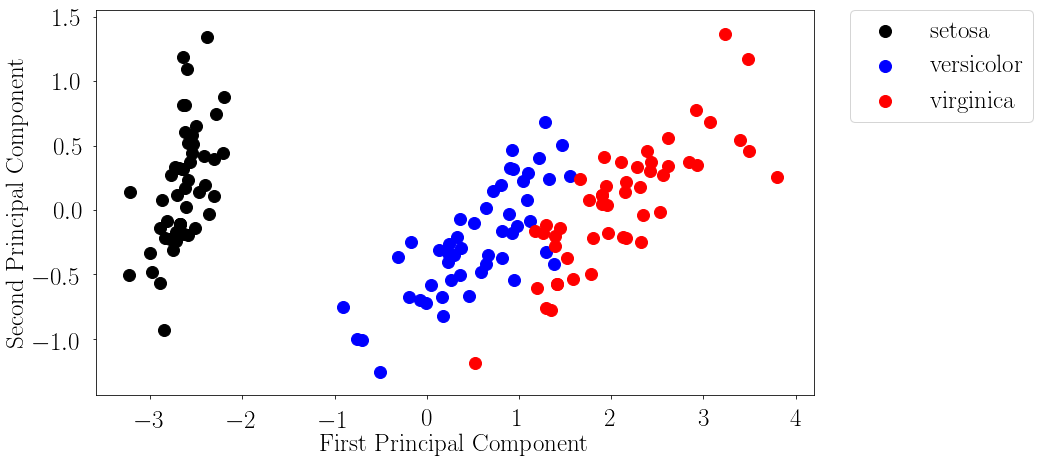

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_iris = PCA(n_components=2)

reduced_data_pca_iris = pca_iris.fit_transform(iris.data)
colors = ['black', 'blue', 'red']
for i in range(len(colors)):
    x = reduced_data_pca_iris[iris.target == i, 0]
    y = reduced_data_pca_iris[iris.target == i, 1]
    plt.scatter(x, y, c=colors[i])
plt.legend(iris.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Conclusion

* involving real-world examples can, according to our opinion, help students to overcome first troubles with programming
* we will probably rethink lectures 3 and 4, as they were too much theoretical and try to come up with a more practical and hands-on explanation of fundamentals of Python
* we also need to improve introduction to classes

# Thank you for your attention!